In [1]:
import luwiji

print(luwiji.__version__)

1.2.1


In [2]:
from luwiji.neural_network import illustration, demo

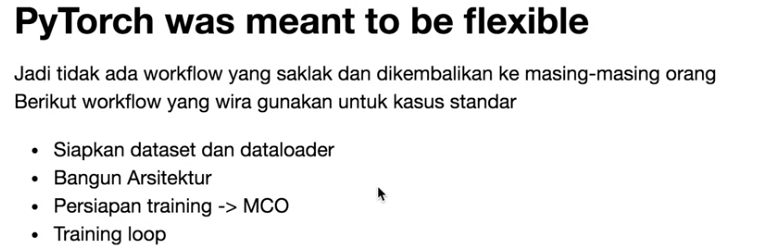

# Sample Data

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.rand(500, 4)
y = np.random.rand(500, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400, 3), (100, 3))

In [7]:
X_train

array([[0.22072172, 0.38743923, 0.78434727, 0.42058478],
       [0.10940474, 0.87108508, 0.31024987, 0.53646045],
       [0.83347689, 0.68726943, 0.46980223, 0.23397606],
       ...,
       [0.97302459, 0.87310977, 0.54533946, 0.35639816],
       [0.03768016, 0.20761955, 0.7977249 , 0.54062225],
       [0.41955573, 0.92996699, 0.07487665, 0.41884993]])

In [8]:
z = np.random.rand(10, 2)
z

array([[0.26387367, 0.72828154],
       [0.45241222, 0.57874579],
       [0.52598782, 0.06021973],
       [0.11950568, 0.89078475],
       [0.03040998, 0.24544017],
       [0.7863816 , 0.64058645],
       [0.34829326, 0.36173987],
       [0.90596803, 0.77808384],
       [0.32788362, 0.63740539],
       [0.06155613, 0.24855018]])

# Step 1: Dataset & Dataloader

In [12]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [13]:
X_train = torch.FloatTensor(X_train) # pytorch tensor
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [15]:
X_train

tensor([[0.2207, 0.3874, 0.7843, 0.4206],
        [0.1094, 0.8711, 0.3102, 0.5365],
        [0.8335, 0.6873, 0.4698, 0.2340],
        ...,
        [0.9730, 0.8731, 0.5453, 0.3564],
        [0.0377, 0.2076, 0.7977, 0.5406],
        [0.4196, 0.9300, 0.0749, 0.4188]])

Dataloader tujuannya agar ada minibatch

In [22]:
train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=32, shuffle=True) # 32 di acak2
# trainloader = DataLoader(train_set, batch_size=32, shuffle=True, num_workers=4) num_workers maksudnya bisa pilih berapca core

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=32)

In [20]:
train_set[0]

(tensor([0.2207, 0.3874, 0.7843, 0.4206]), tensor([0.0665, 0.9563, 0.0376]))

In [19]:
train_set.tensors

(tensor([[0.2207, 0.3874, 0.7843, 0.4206],
         [0.1094, 0.8711, 0.3102, 0.5365],
         [0.8335, 0.6873, 0.4698, 0.2340],
         ...,
         [0.9730, 0.8731, 0.5453, 0.3564],
         [0.0377, 0.2076, 0.7977, 0.5406],
         [0.4196, 0.9300, 0.0749, 0.4188]]),
 tensor([[0.0665, 0.9563, 0.0376],
         [0.6675, 0.1260, 0.5595],
         [0.8229, 0.9392, 0.0871],
         ...,
         [0.1685, 0.6183, 0.5950],
         [0.7224, 0.5281, 0.7125],
         [0.0148, 0.7703, 0.9994]]))

In [21]:
train_set[:10]

(tensor([[0.2207, 0.3874, 0.7843, 0.4206],
         [0.1094, 0.8711, 0.3102, 0.5365],
         [0.8335, 0.6873, 0.4698, 0.2340],
         [0.1667, 0.0105, 0.7984, 0.1854],
         [0.4254, 0.7357, 0.1386, 0.4250],
         [0.0758, 0.3805, 0.1050, 0.3557],
         [0.8892, 0.0205, 0.0513, 0.5215],
         [0.5779, 0.9956, 0.7569, 0.7366],
         [0.2868, 0.1005, 0.0815, 0.2536],
         [0.8479, 0.6145, 0.0093, 0.2875]]),
 tensor([[0.0665, 0.9563, 0.0376],
         [0.6675, 0.1260, 0.5595],
         [0.8229, 0.9392, 0.0871],
         [0.6751, 0.4053, 0.9529],
         [0.6823, 0.9511, 0.8053],
         [0.5425, 0.2080, 0.0913],
         [0.4686, 0.5179, 0.0126],
         [0.7590, 0.3414, 0.4327],
         [0.8200, 0.0076, 0.3399],
         [0.6328, 0.0724, 0.9971]]))

In [23]:
feature, target = next(iter(trainloader))
feature.shape

torch.Size([32, 4])

In [29]:
500 % 32

20

In [30]:
iterator = iter(trainloader)
next(iterator)

[tensor([[0.5793, 0.5716, 0.6235, 0.5012],
         [0.5396, 0.5313, 0.9144, 0.6001],
         [0.9611, 0.0283, 0.2936, 0.8996],
         [0.4196, 0.9300, 0.0749, 0.4188],
         [0.4367, 0.7038, 0.8102, 0.2932],
         [0.4500, 0.6300, 0.6174, 0.8124],
         [0.5052, 0.7551, 0.4134, 0.2069],
         [0.0437, 0.8163, 0.6031, 0.7719],
         [0.9203, 0.9711, 0.9119, 0.0852],
         [0.0377, 0.2076, 0.7977, 0.5406],
         [0.4514, 0.9548, 0.8536, 0.4949],
         [0.3232, 0.1893, 0.1738, 0.7837],
         [0.0160, 0.8415, 0.1073, 0.5614],
         [0.3313, 0.0686, 0.2828, 0.5965],
         [0.0202, 0.1883, 0.2734, 0.1120],
         [0.4237, 0.9069, 0.2822, 0.5548],
         [0.2159, 0.6968, 0.6114, 0.9894],
         [0.1232, 0.3746, 0.5019, 0.7489],
         [0.6159, 0.7591, 0.5198, 0.9152],
         [0.0587, 0.2054, 0.7665, 0.1645],
         [0.0433, 0.6046, 0.3408, 0.5820],
         [0.2149, 0.7033, 0.0833, 0.0434],
         [0.4093, 0.2168, 0.1051, 0.9421],
         [0

# Step 2: Bangun Arsitektur

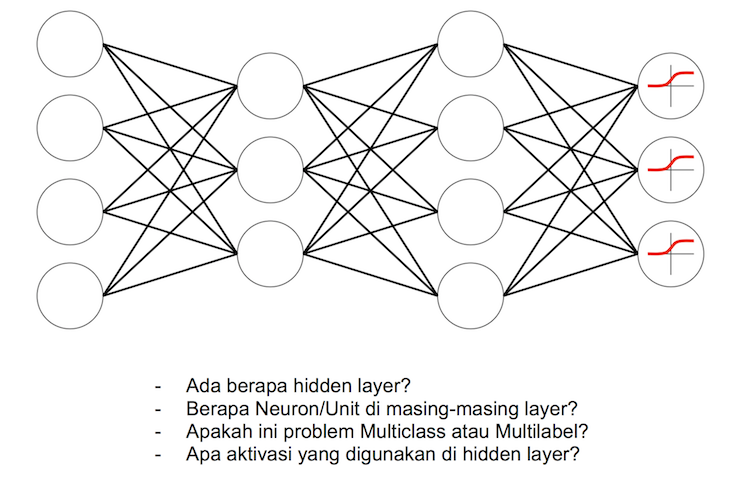

In [31]:
illustration.quiz

In [32]:
from torch import nn

Karena berurutan kita pakai Sequential

In [34]:
nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid()
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

# Step 3: Training Preperation -> MCO

### Model  

In [35]:
model = nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid()
)

### Criteration

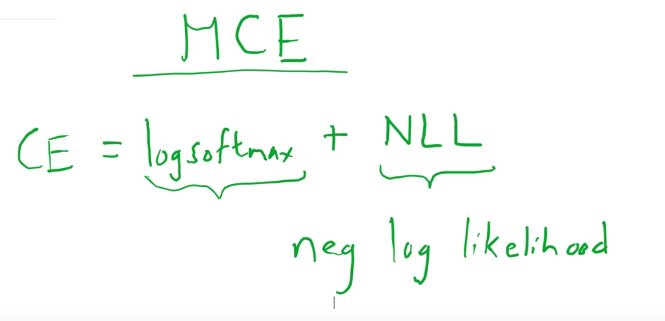

criterion itu fungsi yang dipakai untuk menghitung loss

apa itu Negative log likelihood?

diklasifikasi jika pakai MSE gradient descent nya gagal karena ada plato. Maka itu di klasifikasi pakai MCE = mean cross entropy


di layernya pakai logsoftmax, lossnya neg log likelihood

jika layer terakhir tidak pakai logsoftmax berarti harus pakai crossEntropyloss() 

CrossEntropyLoss adalah kombinasi dari logsoftmax dan neg log likelihood

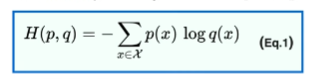

In [36]:
criterion = nn.MSELoss() # model diakhiri Linear -> untuk regresi
criterion = nn.NLLLoss() # model diakhiri logsoftmax -> multiclass clf
criterion = nn.BCELoss() # model diakhiri sigmoid -> binary clf atau multilabel clf

# nn.CrossEntropyLoss() ini untuk klasifikasi jika layer terakhir tidak pakai logsoftmax
# nn.BCEWithLogitsLoss() ini untuk binary cls atau multilabel clf jika di layer terakhir tidak pakai  sigmoid

### Optimizer 

momentum supaya menghindari local minimum dan saddle point

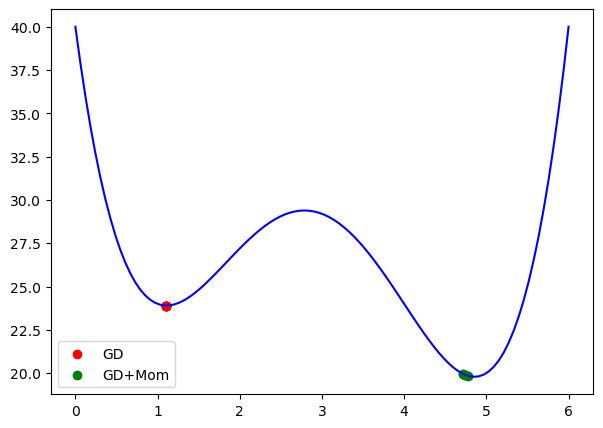

In [39]:
demo.momentum()

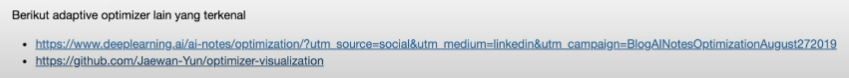

In [40]:
from torch import optim

In [41]:
model

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

AdamW = Adam + Weight Decay

ada L2 Regularization

In [42]:
optimizer = optim.AdamW(model.parameters(), lr=0.001) #AdamW mengurangi overfit karena ada Regularization

In [43]:
from jcopdl.optim import RAdam, Ranger, RangerLARS, Ralamb 

In [44]:
# optimizer = Ralamb(model.parameters(), lr=0.001)

# Step 4: Training Loop

In [45]:
epochs = 500
for i in range(epochs):
    model.train()
    for feature, target in trainloader:
        output = model(feature) # feed forward = masukan feature ke arsitektur. data ke model.
        loss = criterion(output, target) # Hitung loss
        loss.backward() #backprop turunan dari loss kita atau gradient dari loss. otomatis akan mundur dan menghitung gradient
        
        optimizer.step() # update weight
        optimizer.zero_grad() # harus reset optimizernya balikin ke angka nolnya karena syarat diPytorch setelah maju selangkah kalau tidak keambil gradient2 sebelumnya (gradient acumulation).
        
    print(f"\rEpoch: {i+1}/{epochs}", end=" ")

Epoch: 500/500 

In [46]:
epochs = 500
train_cost = []
for i in range(epochs):
    model.train()
    cost = 0
    for feature, target in trainloader:
        output = model(feature) # feed forward
        loss = criterion(output, target)
        loss.backward() #backprop
        
        optimizer.step() #update weight
        optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0] # loss.item agar dapat skalarnya bukan tensor, feature shape banyaknya data
    train_cost.append(cost / len(train_set)) # cost dibagi banyaknya data. rata2 dari loss, MSE tadi
        
    print(f"\rEpoch: {i+1:4}/{epochs:4} | train_cost: {train_cost[-1]:.4f}", end=" ")

Epoch:  500/ 500 | train_cost: 0.6889 

In [47]:
import matplotlib.pyplot as plt

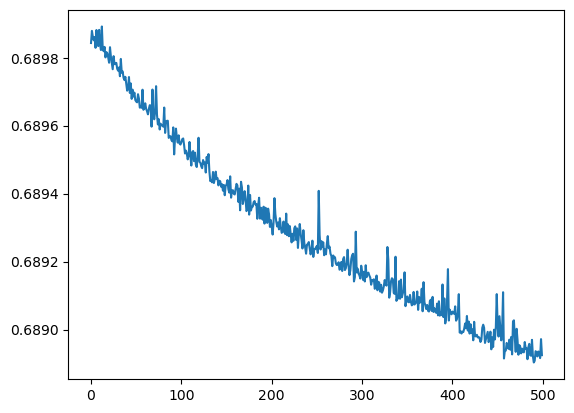

In [48]:
plt.plot(train_cost)